In [9]:
import pandas as pd
import numpy as np

lista_n_ordenada = [
    19, 23, 33, 19, 11, 8, 16, 79, 23, 22, 2, 4, 13, 0, 32, 6, 9, 5, 22, 42, 4, 52, 45, 79,
    11, 32, 31, 4, 1, 96, 67, 5, 3, 22, 67, 14, 25, 1, 4, 23, 19, 15, 1, 24, 0, 56, 16, 124,
    18, 22, 17, 5, 44, 3, 30, 6, 31, 2, 5, 22, 2, 7, 13, 7
]

lista_ordenada = sorted(lista_n_ordenada)

df = pd.DataFrame(lista_ordenada, columns=['Valores'])

print(df.head())

   Valores
0        0
1        0
2        1
3        1
4        1


In [10]:
media = df['Valores'].mean()

mediana = df['Valores'].median()

variancia = df['Valores'].var()

desvio_padrão = df['Valores'].std()

min = df['Valores'].min()

max = df['Valores'].max()

quartis = df['Valores'].quantile([0.25,0.5,0.75])

print(f"Media = {media:.2f}")
print(f"Mediana = {mediana:.2f}")
print(f"Variancia = {variancia:.2f}")
print(f"Desvio Padrão = {desvio_padrão:.2f}")
print(f"Min = {min:.2f}")
print(f"Max = {max:.2f}")
print(f"Quartis = {quartis}")


Media = 22.86
Mediana = 16.50
Variancia = 620.03
Desvio Padrão = 24.90
Min = 0.00
Max = 124.00
Quartis = 0.25     5.00
0.50    16.50
0.75    30.25
Name: Valores, dtype: float64


c:\Users\Pedro\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


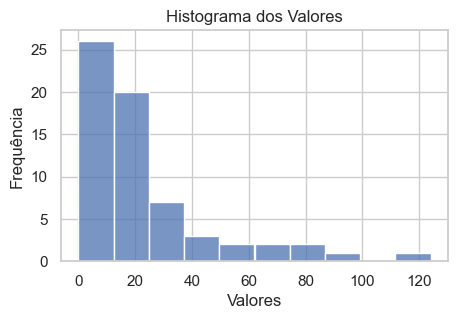

c:\Users\Pedro\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


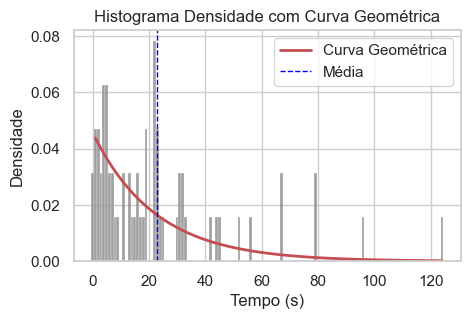

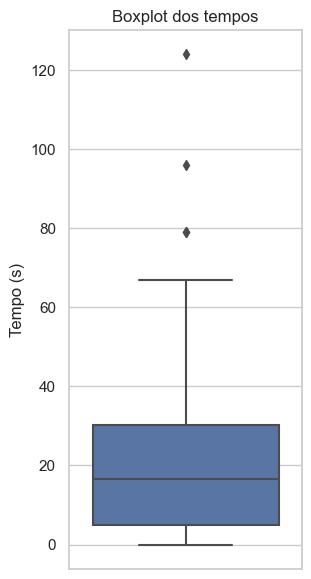

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import geom
import numpy as np
import pandas as pd

# Calculando a média
media = df['Valores'].mean()

# Estimar o parâmetro p da distribuição geométrica
p = 1 / media

# Gerar valores x para a distribuição geométrica
x = np.arange(1, df['Valores'].max() + 1)
y = geom.pmf(x, p)

# Configurando estilo de exibição do Seaborn
sns.set(style="whitegrid")

#Histrograma sem linha de densidade e com frêquencia
plt.figure(figsize=(5, 3))
sns.histplot(df['Valores'], kde=False)
plt.title('Histograma dos Valores')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

# Histograma com linha de densidade e linha vertical para a média
plt.figure(figsize=(5, 3))
sns.histplot(df['Valores'], kde=False, color='gray', stat='density', discrete=True)
plt.plot(x, y, 'r-', lw=2, label='Curva Geométrica')
plt.axvline(media, color='blue', linestyle='dashed', linewidth=1, label='Média')
plt.title('Histograma Densidade com Curva Geométrica')
plt.xlabel('Tempo (s)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(3, 7))
sns.boxplot(y=df['Valores'])
plt.title('Boxplot dos tempos')
plt.ylabel('Tempo (s)')
plt.show()

In [12]:
import scipy.stats as stats

dados_np = np.array(df)

media_np = np.mean(dados_np)

dp_np = np.std(dados_np, ddof=1)

n = len(dados_np)

conf = 0.95
df = n - 1

print(f"Media pontual: {media:.2f}")
print()

intervalo_t = stats.norm.interval(conf, loc=media_np, scale=dp_np/np.sqrt(n))
print(f"Intervalo de confiança para a média ({conf*100}%) aproximadamente: ({intervalo_t[0]:.4f}, {intervalo_t[1]:.3f})")

# Calculando o valor crítico z para o nível de confiança
alpha = 1 - conf        ) aproximadamente: ({lower_bound:.2f}, {upper_bound:.2f})")

Media pontual: 22.86

Intervalo de confiança para a média (95.0%) aproximadamente: (16.7589, 28.960)

Desvio padrão pontual: 24.90 dias
Intervalo de confiança para o desvio padrão (95.0%) aproximadamente: (21.22, 29.21)


In [13]:
p = 1/media

print(f"A distribuição estimada Nn (Seguindo uma distribuição Binomial) para todo k = 1,2,3... é: Nt ~ (n,{p:.2})")
print()
print(f"A distribuição Tk (Seguindo uma distribuição Binomial Negativa) pode ser estimada para todo k = 1,2,3... por: Tk ~(k,{p:.2})")


A distribuição estimada Nn (Seguindo uma distribuição Binomial) para todo k = 1,2,3... é: Nt ~ (n,0.044)

A distribuição Tk (Seguindo uma distribuição Binomial Negativa) pode ser estimada para todo k = 1,2,3... por: Tk ~(k,0.044)


In [14]:
import math
from scipy.stats import nbinom, binom

# (a) Intensidade do processo de alterações de conteúdo no site
lambda_valor = 1 / p
print(f"Intensidade do processo (λ): {lambda_valor:.2f}")

# (b) Tempo médio entre alterações sucessivas de conteúdo no site
tempo_medio_entre_alteracoes = p
print(f"Tempo médio entre alterações (μ): {tempo_medio_entre_alteracoes:.2f}")

# (c) Probabilidade de duas ou mais mudanças em um dia
k = 2  # número mínimo de mudanças desejadas
prob_duas_ou_mais_mudancas = 1 - nbinom.cdf(k-1, k, p)
print(f"Probabilidade de duas ou mais mudanças em um dia: {prob_duas_ou_mais_mudancas*100:.2f}%")

# (d) Probabilidade de não haver alterações no conteúdo em cinco dias
n_dias = 5
prob_sem_mudancas_5_dias = binom.pmf(0, n_dias, p)
print(f"Probabilidade de não haver alterações em cinco dias: {prob_sem_mudancas_5_dias*100:.2f}%")

# (e) Probabilidade de duas ou menos mudanças em cinco dias
prob_duas_ou_menos_mudancas_5_dias = binom.cdf(2, n_dias, p)
print(f"Probabilidade de duas ou menos mudanças em cinco dias: {prob_duas_ou_menos_mudancas_5_dias*100:.2f}%")


Intensidade do processo (λ): 22.86
Tempo médio entre alterações (μ): 0.04
Probabilidade de duas ou mais mudanças em um dia: 99.44%
Probabilidade de não haver alterações em cinco dias: 79.96%
Probabilidade de duas ou menos mudanças em cinco dias: 99.92%
